In [1]:
import numpy as np
import tensorflow as tf
from load_dataset import load_dataset
import matplotlib.pyplot as plt

In [2]:
x_train,t_train = load_dataset('./train_dataset',convert_type='RGB',flatten=True,normalize=True,one_hot_label=True)
x_test,t_test = load_dataset('./test_dataset',convert_type='RGB',flatten=True,normalize=True,one_hot_label=True)

Load label : Done!
Load img : Done!
Load label : Done!
Load img : Done!


In [3]:
def list_shuffle(datas,labels):
    index_list = np.arange(0,datas.shape[0])
    np.random.shuffle(index_list)
    x_data = datas[index_list]
    t_data = labels[index_list]
    return x_data,t_data

In [4]:
x_train_shuffle,t_train_shuffle = list_shuffle(x_train,t_train)
x_test_shuffle,t_test_shuffle = list_shuffle(x_test,t_test)

In [5]:
# 入力層
X = tf.placeholder(tf.float32, shape=[None, 64*64*3], name="input")
t = tf.placeholder(tf.float32, shape=[None, 2])
# パラメータ
W = tf.Variable(tf.zeros([64*64*3,2]))
b = tf.Variable(tf.zeros([2]))
# 出力層
y = tf.matmul(X,W) + b
p = tf.nn.softmax(y,name="output")
# 損失関数
cross_entropy = t * tf.log(p)
loss = -tf.reduce_mean(cross_entropy)
# 学習アルゴリズム
optimizer = tf.train.AdamOptimizer(1e-4)
train_step = optimizer.minimize(loss)
# 精度
correct_prediction = tf.equal(tf.argmax(p,1), tf.argmax(t,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(3000):
    sess.run(train_step,feed_dict={X: x_train_shuffle, t: t_train_shuffle})
    if i % 500 == 0:
        train_acc, train_loss = sess.run([accuracy,loss], feed_dict={X: x_train_shuffle, t: t_train_shuffle})
        test_acc = sess.run(accuracy, feed_dict={X: x_test_shuffle, t: t_test_shuffle})
        print "[Train] step: %d, loss: %f, acc: %f, [Test] acc : %f" % (i, train_loss, train_acc,test_acc)

[Train] step: 0, loss: 0.300876, acc: 0.982143, [Test] acc : 1.000000
[Train] step: 500, loss: 0.000946, acc: 1.000000, [Test] acc : 1.000000
[Train] step: 1000, loss: 0.000333, acc: 1.000000, [Test] acc : 1.000000
[Train] step: 1500, loss: 0.000171, acc: 1.000000, [Test] acc : 1.000000
[Train] step: 2000, loss: 0.000103, acc: 1.000000, [Test] acc : 1.000000
[Train] step: 2500, loss: 0.000067, acc: 1.000000, [Test] acc : 1.000000


Mark is Stop


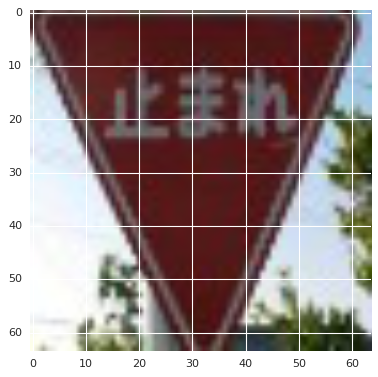

In [7]:
from PIL import Image
im = Image.open("./test_dataset/stop-00094.jpg", "r")
plt.imshow(np.array(im))
img = np.frombuffer(np.array(im),dtype=np.uint8)
img = img.astype(np.float32)
img /= 255.0
predict_img = np.array([img])
ans = np.argmax(sess.run(p,feed_dict={X:predict_img}))
if(ans == 0):
  print('Mark is Stop')
elif(ans == 1):
  print('Mark is limitspeed')